# Experiments on Random Osborne Algorithm for Matrix Balancing

In [2]:
import osborn
import time
import scipy
import numpy as np
import matplotlib.pyplot as plt
import utils
from tqdm import tqdm

greedy:   2%|▎         | 1/40 [00:00<00:24,  1.58it/s]

1.0737763940797335e-07


greedy:   5%|▌         | 2/40 [00:01<00:22,  1.66it/s]

1.0487777696137259e-07


greedy:   8%|▊         | 3/40 [00:01<00:24,  1.53it/s]

1.2173916885955707e-07


greedy:  10%|█         | 4/40 [00:02<00:24,  1.45it/s]

1.3596668610705212e-07


greedy:  12%|█▎        | 5/40 [00:03<00:24,  1.44it/s]

1.263597976543418e-07


greedy:  15%|█▌        | 6/40 [00:04<00:23,  1.42it/s]

1.1472902811650482e-07


greedy:  18%|█▊        | 7/40 [00:04<00:23,  1.41it/s]

1.0502274473538124e-07


greedy:  20%|██        | 8/40 [00:05<00:26,  1.21it/s]

1.488349707078691e-07


greedy:  22%|██▎       | 9/40 [00:07<00:28,  1.08it/s]

1.4589919097071178e-07


greedy:  25%|██▌       | 10/40 [00:08<00:30,  1.01s/it]

1.4266111197973433e-07


greedy:  28%|██▊       | 11/40 [00:09<00:29,  1.02s/it]

1.317148634363748e-07


greedy:  30%|███       | 12/40 [00:10<00:32,  1.16s/it]

1.8343350196818917e-07


greedy:  32%|███▎      | 13/40 [00:11<00:30,  1.14s/it]

1.2963419805800168e-07


greedy:  35%|███▌      | 14/40 [00:13<00:30,  1.19s/it]

1.2974078968520352e-07


greedy:  38%|███▊      | 15/40 [00:14<00:30,  1.22s/it]

1.5185847201277585e-07


greedy:  40%|████      | 16/40 [00:15<00:29,  1.21s/it]

1.2554485507197068e-07


greedy:  42%|████▎     | 17/40 [00:17<00:29,  1.30s/it]

1.4845450787887204e-07


greedy:  45%|████▌     | 18/40 [00:18<00:31,  1.45s/it]

1.783128347354248e-07


greedy:  48%|████▊     | 19/40 [00:20<00:33,  1.62s/it]

1.9462003874128778e-07


greedy:  50%|█████     | 20/40 [00:23<00:34,  1.75s/it]

1.9469370575675125e-07


greedy:  52%|█████▎    | 21/40 [00:24<00:33,  1.75s/it]

1.6759875181220617e-07


greedy:  55%|█████▌    | 22/40 [00:26<00:30,  1.72s/it]

1.3346809594950058e-07


greedy:  57%|█████▊    | 23/40 [00:28<00:28,  1.70s/it]

1.3580512816647464e-07


greedy:  60%|██████    | 24/40 [00:30<00:28,  1.78s/it]

1.6977089364595842e-07


greedy:  62%|██████▎   | 25/40 [00:32<00:29,  1.97s/it]

1.9558452998086955e-07


greedy:  65%|██████▌   | 26/40 [00:34<00:28,  2.05s/it]

1.7147216294038418e-07


greedy:  68%|██████▊   | 27/40 [00:37<00:28,  2.18s/it]

1.926501950866917e-07


greedy:  70%|███████   | 28/40 [00:39<00:26,  2.17s/it]

1.636481605518936e-07


greedy:  72%|███████▎  | 29/40 [00:41<00:25,  2.32s/it]

1.9135085126766547e-07


greedy:  75%|███████▌  | 30/40 [00:45<00:25,  2.53s/it]

1.9519078181912206e-07


greedy:  78%|███████▊  | 31/40 [00:47<00:22,  2.52s/it]

1.6696491017209894e-07


greedy:  80%|████████  | 32/40 [00:50<00:22,  2.75s/it]

2.0026766160754602e-07


greedy:  82%|████████▎ | 33/40 [00:54<00:21,  3.03s/it]

2.6173172154340795e-07


greedy:  85%|████████▌ | 34/40 [00:58<00:19,  3.29s/it]

2.3803645475038104e-07


greedy:  88%|████████▊ | 35/40 [01:02<00:17,  3.42s/it]

2.2669155047593258e-07


greedy:  90%|█████████ | 36/40 [01:07<00:15,  3.93s/it]

2.2930520350483515e-07


greedy:  92%|█████████▎| 37/40 [01:14<00:14,  4.82s/it]

3.07989577863868e-07


greedy:  95%|█████████▌| 38/40 [01:19<00:09,  4.97s/it]

2.2437100088456613e-07


greedy:  98%|█████████▊| 39/40 [01:27<00:05,  5.83s/it]

2.4472109082454017e-07


greedy: 100%|██████████| 40/40 [01:35<00:00,  2.38s/it]

2.3854882774958954e-07


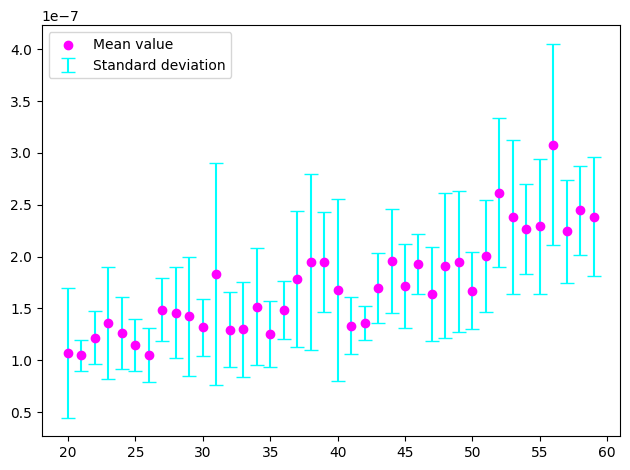

cyclic:   2%|▎         | 1/40 [00:00<00:33,  1.17it/s]

1.42010137757263e-07


cyclic:   5%|▌         | 2/40 [00:01<00:35,  1.06it/s]

1.8168598799938467e-07


cyclic:   8%|▊         | 3/40 [00:03<00:38,  1.05s/it]

1.9497911214244696e-07


cyclic:  10%|█         | 4/40 [00:04<00:38,  1.08s/it]

1.8678676351073856e-07


cyclic:  12%|█▎        | 5/40 [00:05<00:39,  1.12s/it]

2.074395158990837e-07


cyclic:  15%|█▌        | 6/40 [00:06<00:40,  1.18s/it]

2.0471073145558966e-07


cyclic:  18%|█▊        | 7/40 [00:08<00:43,  1.33s/it]

2.3746841774861775e-07


cyclic:  20%|██        | 8/40 [00:09<00:41,  1.29s/it]

1.7623907361278492e-07


cyclic:  22%|██▎       | 9/40 [00:10<00:38,  1.23s/it]

1.4179501802688336e-07


cyclic:  25%|██▌       | 10/40 [00:12<00:39,  1.31s/it]

1.7927425961005018e-07


cyclic:  28%|██▊       | 11/40 [00:13<00:40,  1.40s/it]

1.9990241773193484e-07


cyclic:  30%|███       | 12/40 [00:14<00:38,  1.37s/it]

1.647260738751713e-07


cyclic:  32%|███▎      | 13/40 [00:16<00:38,  1.42s/it]

1.804021972884136e-07


cyclic:  35%|███▌      | 14/40 [00:18<00:40,  1.55s/it]

2.0046433888849097e-07


cyclic:  38%|███▊      | 15/40 [00:20<00:40,  1.61s/it]

1.9339684568750227e-07


cyclic:  40%|████      | 16/40 [00:21<00:40,  1.68s/it]

2.1390288357410822e-07


cyclic:  42%|████▎     | 17/40 [00:24<00:41,  1.81s/it]

2.2146338069928632e-07


cyclic:  45%|████▌     | 18/40 [00:26<00:43,  1.98s/it]

2.3369941663229809e-07


cyclic:  48%|████▊     | 19/40 [00:28<00:40,  1.94s/it]

1.8225337433426415e-07


cyclic:  50%|█████     | 20/40 [00:30<00:39,  2.00s/it]

1.969135584573482e-07


cyclic:  52%|█████▎    | 21/40 [00:32<00:38,  2.02s/it]

1.9678017103972217e-07


cyclic:  55%|█████▌    | 22/40 [00:34<00:38,  2.17s/it]

2.2531462162702438e-07


cyclic:  57%|█████▊    | 23/40 [00:38<00:41,  2.45s/it]

2.510233601375672e-07


cyclic:  60%|██████    | 24/40 [00:41<00:41,  2.59s/it]

2.3711495913977793e-07


cyclic:  62%|██████▎   | 25/40 [00:44<00:41,  2.78s/it]

2.633976527219448e-07


cyclic:  65%|██████▌   | 26/40 [00:47<00:41,  2.98s/it]

2.846782379228234e-07


cyclic:  68%|██████▊   | 27/40 [00:50<00:39,  3.05s/it]

2.5549881204893755e-07


cyclic:  70%|███████   | 28/40 [00:53<00:36,  3.04s/it]

2.237344629265997e-07


cyclic:  72%|███████▎  | 29/40 [00:57<00:35,  3.24s/it]

2.794836065564923e-07


cyclic:  75%|███████▌  | 30/40 [01:01<00:33,  3.40s/it]

2.8052091625080223e-07


cyclic:  78%|███████▊  | 31/40 [01:05<00:31,  3.47s/it]

2.315523651538386e-07


cyclic:  80%|████████  | 32/40 [01:08<00:28,  3.54s/it]

2.517161146802197e-07


cyclic:  82%|████████▎ | 33/40 [01:12<00:25,  3.70s/it]

2.642248613706117e-07


cyclic:  85%|████████▌ | 34/40 [01:17<00:24,  4.02s/it]

2.8100362702538866e-07


cyclic:  88%|████████▊ | 35/40 [01:22<00:20,  4.16s/it]

2.369737160969292e-07


cyclic:  90%|█████████ | 36/40 [01:27<00:18,  4.66s/it]

3.0327365572357267e-07


cyclic:  92%|█████████▎| 37/40 [01:35<00:16,  5.48s/it]

3.63900760105778e-07


cyclic:  95%|█████████▌| 38/40 [01:41<00:11,  5.64s/it]

2.869299535426187e-07


cyclic:  98%|█████████▊| 39/40 [01:51<00:07,  7.16s/it]

3.5478108025528324e-07


cyclic: 100%|██████████| 40/40 [02:01<00:00,  3.04s/it]

3.0738863202618493e-07


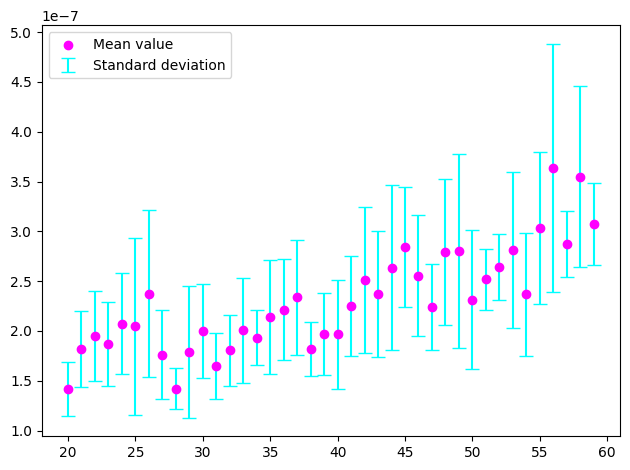

random:   2%|▎         | 1/40 [00:01<01:11,  1.84s/it]

3.0183933611272704e-07


random:   5%|▌         | 2/40 [00:03<01:05,  1.72s/it]

2.895673071943475e-07


random:   8%|▊         | 3/40 [00:05<01:01,  1.67s/it]

2.8119143025829004e-07


random:  10%|█         | 4/40 [00:07<01:06,  1.84s/it]

3.6096501258979475e-07


random:  12%|█▎        | 5/40 [00:09<01:10,  2.00s/it]

3.99875458556009e-07


random:  15%|█▌        | 6/40 [00:11<01:10,  2.08s/it]

3.853940087079273e-07


random:  18%|█▊        | 7/40 [00:14<01:12,  2.18s/it]

3.366124466389536e-07


random:  20%|██        | 8/40 [00:16<01:15,  2.35s/it]

4.2201145435740406e-07


random:  22%|██▎       | 9/40 [00:20<01:21,  2.64s/it]

4.344643933185579e-07


random:  25%|██▌       | 10/40 [00:23<01:21,  2.73s/it]

3.984644858879606e-07


random:  28%|██▊       | 11/40 [00:26<01:25,  2.94s/it]

4.5593871984847444e-07


random:  30%|███       | 12/40 [00:30<01:27,  3.13s/it]

4.3090284781839654e-07


random:  32%|███▎      | 13/40 [00:33<01:24,  3.14s/it]

3.7793972183758705e-07


random:  35%|███▌      | 14/40 [00:36<01:23,  3.21s/it]

3.94810091356308e-07


random:  38%|███▊      | 15/40 [00:40<01:22,  3.30s/it]

3.8930032926243e-07


random:  40%|████      | 16/40 [00:43<01:21,  3.41s/it]

3.844929561702265e-07


random:  42%|████▎     | 17/40 [00:47<01:23,  3.62s/it]

4.3419686977468996e-07


random:  45%|████▌     | 18/40 [00:52<01:29,  4.07s/it]

4.97570497007137e-07


random:  48%|████▊     | 19/40 [00:57<01:28,  4.20s/it]

4.408296028231656e-07


random:  50%|█████     | 20/40 [01:02<01:29,  4.50s/it]

4.7966551100496e-07


random:  52%|█████▎    | 21/40 [01:09<01:40,  5.29s/it]

6.475181233730699e-07


random:  55%|█████▌    | 22/40 [01:15<01:39,  5.55s/it]

5.331777746490739e-07


random:  57%|█████▊    | 23/40 [01:21<01:34,  5.55s/it]

4.940604513273353e-07


random:  60%|██████    | 24/40 [01:26<01:27,  5.50s/it]

4.607145948503211e-07


random:  62%|██████▎   | 25/40 [01:32<01:25,  5.68s/it]

5.066715738829421e-07


random:  65%|██████▌   | 26/40 [01:40<01:27,  6.25s/it]

5.976479039680521e-07


random:  68%|██████▊   | 27/40 [01:47<01:24,  6.54s/it]

5.647861320586489e-07


random:  70%|███████   | 28/40 [01:54<01:20,  6.73s/it]

5.786531374177137e-07


random:  72%|███████▎  | 29/40 [02:02<01:16,  6.96s/it]

5.91193929089179e-07


random:  75%|███████▌  | 30/40 [02:10<01:12,  7.21s/it]

6.07400526807073e-07


random:  78%|███████▊  | 31/40 [02:19<01:09,  7.69s/it]

5.58388561430162e-07


random:  80%|████████  | 32/40 [02:30<01:10,  8.79s/it]

7.343679567499597e-07


random:  82%|████████▎ | 33/40 [02:39<01:02,  8.97s/it]

6.462664396381503e-07


random:  85%|████████▌ | 34/40 [02:48<00:52,  8.81s/it]

5.295343483952515e-07


random:  88%|████████▊ | 35/40 [02:58<00:45,  9.11s/it]

5.864226589688265e-07


random:  90%|█████████ | 36/40 [03:06<00:35,  8.91s/it]

4.925111503702208e-07


random:  92%|█████████▎| 37/40 [03:16<00:27,  9.22s/it]

5.695064080434104e-07


random:  95%|█████████▌| 38/40 [03:26<00:18,  9.46s/it]

5.458072417114242e-07


random:  98%|█████████▊| 39/40 [03:38<00:10, 10.29s/it]

6.955230321214424e-07


random: 100%|██████████| 40/40 [03:52<00:00,  5.82s/it]

6.619906339895119e-07


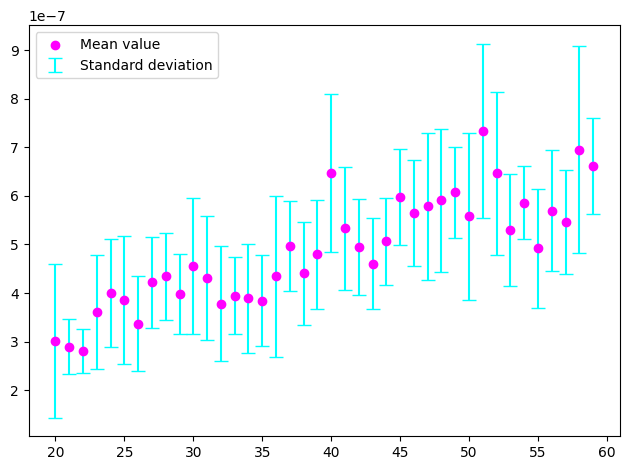

random_cyclic:   2%|▎         | 1/40 [00:00<00:31,  1.23it/s]

1.4474199164128952e-07


random_cyclic:   5%|▌         | 2/40 [00:01<00:30,  1.23it/s]

1.3859657144226657e-07


random_cyclic:   8%|▊         | 3/40 [00:02<00:30,  1.20it/s]

1.5154576851708823e-07


random_cyclic:  10%|█         | 4/40 [00:03<00:31,  1.13it/s]

1.5950440600568202e-07


random_cyclic:  12%|█▎        | 5/40 [00:04<00:31,  1.11it/s]

1.4815423561685817e-07


random_cyclic:  15%|█▌        | 6/40 [00:05<00:31,  1.06it/s]

1.5265756758658472e-07


random_cyclic:  18%|█▊        | 7/40 [00:06<00:34,  1.03s/it]

1.7971856975359772e-07


random_cyclic:  20%|██        | 8/40 [00:07<00:34,  1.09s/it]

1.6859595308627877e-07


random_cyclic:  22%|██▎       | 9/40 [00:09<00:36,  1.16s/it]

1.662553165244331e-07


random_cyclic:  25%|██▌       | 10/40 [00:10<00:36,  1.22s/it]

1.769183441319826e-07


random_cyclic:  28%|██▊       | 11/40 [00:12<00:38,  1.34s/it]

2.044734535569661e-07


random_cyclic:  30%|███       | 12/40 [00:13<00:41,  1.47s/it]

2.1867883563484077e-07


random_cyclic:  32%|███▎      | 13/40 [00:15<00:41,  1.54s/it]

2.0181323689935988e-07


random_cyclic:  35%|███▌      | 14/40 [00:17<00:42,  1.64s/it]

2.2855055284481365e-07


random_cyclic:  38%|███▊      | 15/40 [00:19<00:44,  1.79s/it]

2.361262211782327e-07


random_cyclic:  40%|████      | 16/40 [00:21<00:43,  1.82s/it]

2.0352278819656648e-07


random_cyclic:  42%|████▎     | 17/40 [00:23<00:45,  1.96s/it]

2.318862186317228e-07


random_cyclic:  45%|████▌     | 18/40 [00:26<00:46,  2.11s/it]

2.4434442251850934e-07


random_cyclic:  48%|████▊     | 19/40 [00:28<00:46,  2.23s/it]

2.5214361711791823e-07


random_cyclic:  50%|█████     | 20/40 [00:31<00:46,  2.35s/it]

2.492415701325637e-07


random_cyclic:  52%|█████▎    | 21/40 [00:34<00:46,  2.44s/it]

2.543186221227484e-07


random_cyclic:  55%|█████▌    | 22/40 [00:37<00:48,  2.68s/it]

2.756146594049656e-07


random_cyclic:  57%|█████▊    | 23/40 [00:40<00:46,  2.72s/it]

2.3099164290167653e-07


random_cyclic:  60%|██████    | 24/40 [00:42<00:42,  2.68s/it]

2.214507760216057e-07


random_cyclic:  62%|██████▎   | 25/40 [00:45<00:43,  2.87s/it]

2.5737503633277144e-07


random_cyclic:  65%|██████▌   | 26/40 [00:49<00:41,  2.99s/it]

2.7011755974683925e-07


random_cyclic:  68%|██████▊   | 27/40 [00:53<00:41,  3.22s/it]

2.9850725382585927e-07


random_cyclic:  70%|███████   | 28/40 [00:56<00:39,  3.27s/it]

2.5819402165918855e-07


random_cyclic:  72%|███████▎  | 29/40 [01:00<00:38,  3.52s/it]

3.0092537464093176e-07


random_cyclic:  75%|███████▌  | 30/40 [01:04<00:36,  3.64s/it]

2.700253020604315e-07


random_cyclic:  78%|███████▊  | 31/40 [01:08<00:33,  3.76s/it]

2.954093153123115e-07


random_cyclic:  80%|████████  | 32/40 [01:12<00:31,  3.99s/it]

3.120777159424563e-07


random_cyclic:  82%|████████▎ | 33/40 [01:18<00:30,  4.32s/it]

3.3643848778377666e-07


random_cyclic:  85%|████████▌ | 34/40 [01:22<00:27,  4.50s/it]

3.2504807092708826e-07


random_cyclic:  88%|████████▊ | 35/40 [01:28<00:23,  4.74s/it]

3.279493226904057e-07


random_cyclic:  90%|█████████ | 36/40 [01:34<00:20,  5.22s/it]

3.5878621399752193e-07


random_cyclic:  92%|█████████▎| 37/40 [01:40<00:16,  5.43s/it]

3.19438751668798e-07


random_cyclic:  95%|█████████▌| 38/40 [01:47<00:11,  5.75s/it]

2.8848787623200384e-07


random_cyclic:  98%|█████████▊| 39/40 [01:55<00:06,  6.61s/it]

3.3319349169489624e-07


random_cyclic: 100%|██████████| 40/40 [02:06<00:00,  3.17s/it]

3.577714228087963e-07


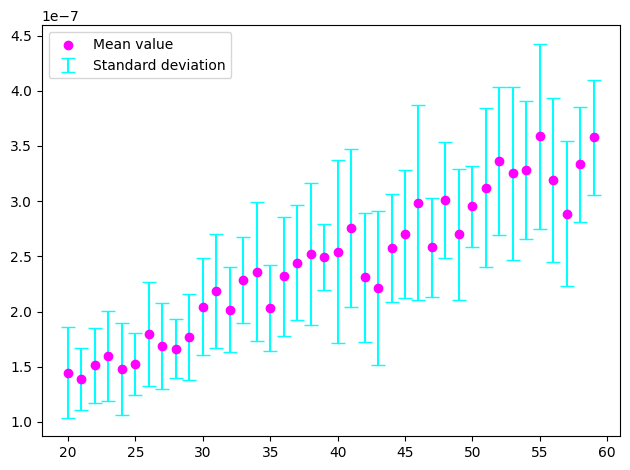

In [12]:
epsilon=1e-2

for method in ['greedy', 'cyclic', 'random', 'random_cyclic']:
    x = []
    times = []
    x_mean = []
    times_mean = []
    times_std = []
    m = 175
    kappa = 300
    for n in tqdm(range(20, 60), desc=method):
        for _ in range(10):
            #matrix = utils.generate_matrix_params(n=n, m=m, kappa=kappa)
            matrix = utils.generate_sparse_matrix(n=n, m=m)
            kappa = matrix.sum()/np.min(matrix.data)
            d = utils.diameter_of_matrix(matrix)

            balancer = osborn.MatrixBalancer(matrix, device='cpu', epsilon=epsilon)
            start_time = time.time()
            balanced_matrix, it = balancer.balance(method=method)
            #times.append((time.time() - start_time))
            times.append((time.time() - start_time) / (m * min(d, 1/epsilon) * np.log(kappa) /epsilon))
            #times.append((m * min(d, 1/epsilon) * np.log(kappa) /epsilon))
            # / (m * min(d, 1/epsilon) * np.log(kappa) /epsilon)
            x.append(n)
        x_mean.append(n)
        times_mean.append(np.mean(times[-10:]))
        times_std.append(np.std(times[-10:]))

    plt.errorbar(x_mean, times_mean, yerr=times_std, fmt="none", capsize=5., label="Standard deviation", color="cyan", zorder=1)
    plt.scatter(x_mean, times_mean, label="Mean value", color="magenta")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"{method}_function_of_n_n_20_60__kappa_{kappa}.pdf")
    plt.show()

greedy: 100%|██████████| 240/240 [02:11<00:00,  1.83it/s]


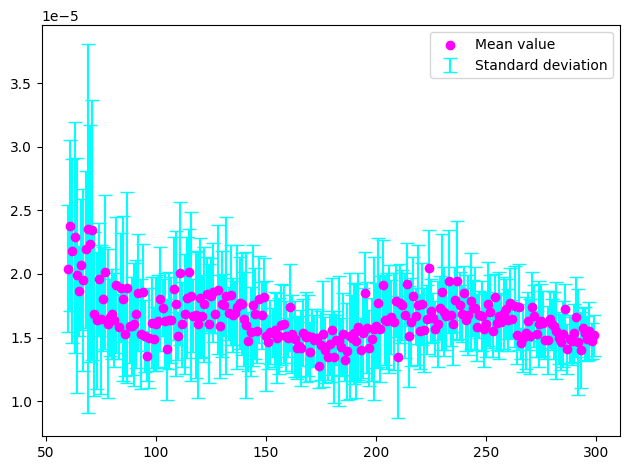

cyclic: 100%|██████████| 240/240 [03:01<00:00,  1.32it/s]


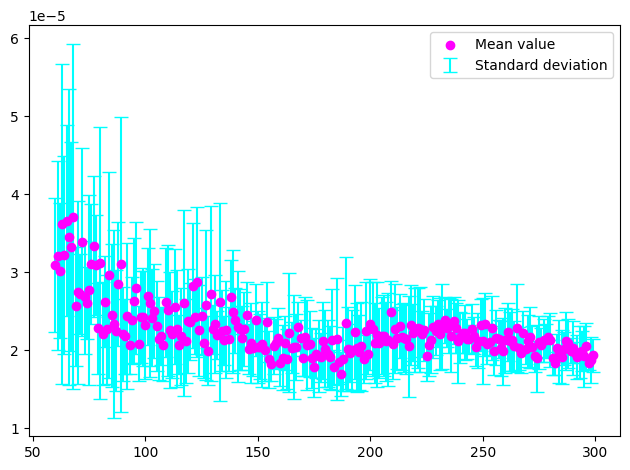

random: 100%|██████████| 240/240 [06:14<00:00,  1.56s/it]


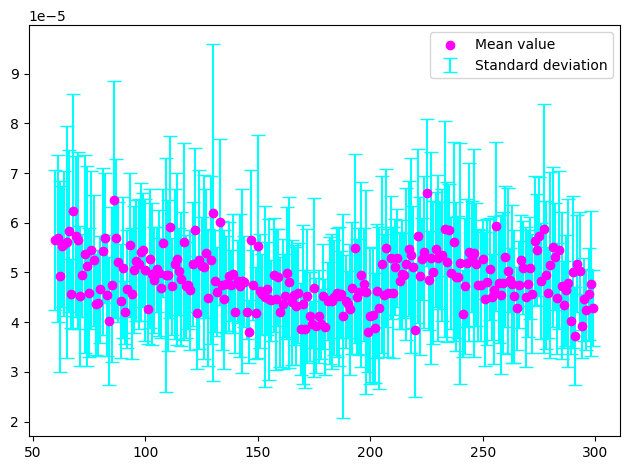

random_cyclic: 100%|██████████| 240/240 [03:14<00:00,  1.23it/s]


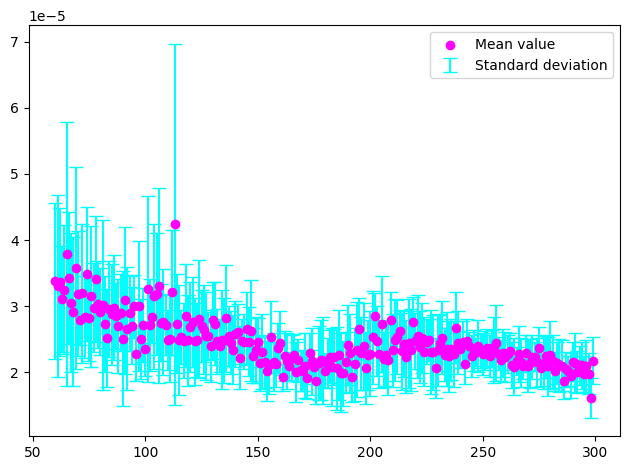

In [27]:
epsilon=1e-2

for method in ['greedy', 'cyclic', 'random', 'random_cyclic']:
    x = []
    times = []
    x_mean = []
    times_mean = []
    times_std = []
    #kappa = 300
    n = 20
    for m in tqdm(range(60, 300), desc=method):
        for _ in range(10):
            matrix = utils.generate_sparse_matrix(n=n, m=m)
            kappa = matrix.sum()/np.min(matrix.data)
            d = utils.diameter_of_matrix(matrix)

            balancer = osborn.MatrixBalancer(matrix, device='cpu', epsilon=epsilon)
            start_time = time.time()
            balanced_matrix, it = balancer.balance(method=method)
            #times.append((time.time() - start_time))
            times.append((time.time() - start_time) / (min(d, 1/epsilon) * np.log(kappa) /epsilon))
            #times.append((m * min(d, 1/epsilon) * np.log(kappa) /epsilon))
            # / (m * min(d, 1/epsilon) * np.log(kappa) /epsilon)
            x.append(m)
        x_mean.append(m)
        times_mean.append(np.mean(times[-10:]))
        times_std.append(np.std(times[-10:]))
        #print(times_mean[-1])

    plt.errorbar(x_mean, times_mean, yerr=times_std, fmt="none", capsize=5., label="Standard deviation", color="cyan", zorder=1)
    plt.scatter(x_mean, times_mean, label="Mean value", color="magenta")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"{method}_function_of_m_n_10_m_20_90_kappa_{kappa}.pdf")
    plt.show()

Kappa: 100%|██████████| 240/240 [00:04<00:00, 58.65it/s]


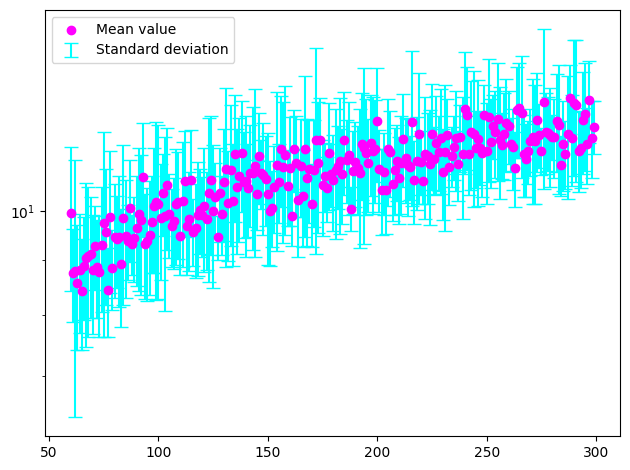

In [3]:
times = []
x_mean = []
times_mean = []
times_std = []
n = 20
for m in tqdm(range(60, 300), desc="Kappa"):
    for _ in range(10):
        matrix = utils.generate_sparse_matrix(n=n, m=m)
        kappa = matrix.sum()/np.min(matrix.data)
        times.append(np.log(kappa))
    x_mean.append(m)
    times_mean.append(np.mean(times[-10:]))
    times_std.append(np.std(times[-10:]))

plt.errorbar(x_mean, times_mean, yerr=times_std, fmt="none", capsize=5., label="Standard deviation", color="cyan", zorder=1)
plt.scatter(x_mean, times_mean, label="Mean value", color="magenta")
plt.yscale("log")
plt.legend()
plt.tight_layout()
plt.savefig(f"kappa.pdf")
plt.show()

d: 100%|██████████| 240/240 [00:11<00:00, 20.05it/s]


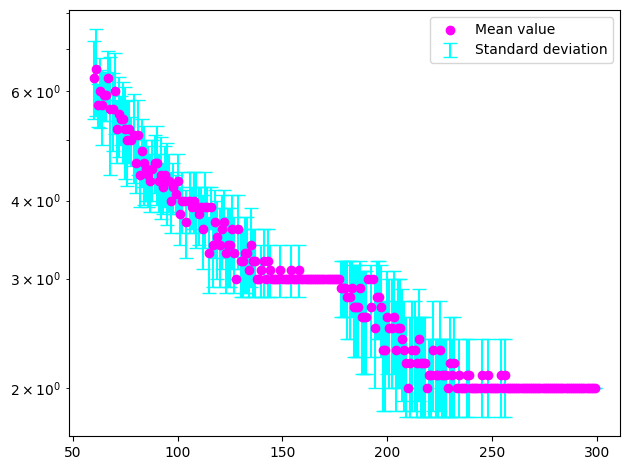

In [4]:
times = []
x_mean = []
times_mean = []
times_std = []
n = 20
for m in tqdm(range(60, 300), desc="d"):
    for _ in range(10):
        matrix = utils.generate_sparse_matrix(n=n, m=m)
        d = utils.diameter_of_matrix(matrix)
        times.append(d)
    x_mean.append(m)
    times_mean.append(np.mean(times[-10:]))
    times_std.append(np.std(times[-10:]))

plt.errorbar(x_mean, times_mean, yerr=times_std, fmt="none", capsize=5., label="Standard deviation", color="cyan", zorder=1)
plt.scatter(x_mean, times_mean, label="Mean value", color="magenta")
plt.yscale("log")
plt.legend()
plt.tight_layout()
plt.savefig(f"d.pdf")
plt.show()